<img src="./images/banner.png" width="800">

# Introduction to Gradient Descent

The concept of gradient descent has a rich history dating back to the 19th century. Understanding its origins helps us appreciate its significance in modern machine learning.

- **Early Beginnings**
    - **1847**: The method was first proposed by the French mathematician **Augustin-Louis Cauchy**.
    - Cauchy introduced it in the context of solving systems of equations using the steepest descent method.

- **Evolution in Optimization**
    - **1960s**: The algorithm gained prominence in the field of optimization.
    - It was extensively studied and applied to various mathematical problems.

- **Adoption in Machine Learning**
    - **1960s-1970s**: As machine learning began to emerge, researchers recognized the potential of gradient descent for training models.
    - **1986**: The backpropagation algorithm, which uses gradient descent, was popularized by Rumelhart, Hinton, and Williams, revolutionizing neural network training.

- **Modern Era**
    - **1990s-2000s**: With the rise of big data and more powerful computers, stochastic and mini-batch variants of gradient descent were developed to handle large-scale problems more efficiently.
    - **2010s onwards**: Advanced variants like Adam, RMSprop, and others have been introduced, further improving the algorithm's performance in deep learning applications.


Despite its age, gradient descent remains a cornerstone in machine learning optimization for several reasons:

1. **Adaptability**: It has evolved to meet the changing needs of the field.
2. **Simplicity**: The core concept is intuitive, making it accessible to learners and practitioners.
3. **Effectiveness**: It consistently performs well across a wide range of problems.


Understanding the historical context of gradient descent helps us appreciate its enduring relevance in the rapidly evolving field of machine learning. As we delve deeper into its mechanics and variants, keep in mind that you're working with an algorithm that has been refined and improved over nearly two centuries of mathematical and computational advancements.


While gradient descent is powerful, it's not always the best choice. Here are some alternative optimization techniques:

1. **Newton's Method**: 
   - Faster convergence for some problems
   - Uses second-order derivatives
   - Computationally expensive for high-dimensional problems

2. **Quasi-Newton Methods (e.g., BFGS, L-BFGS)**:
   - Approximate the Hessian matrix
   - Often faster than gradient descent
   - More memory-efficient than Newton's method

3. **Conjugate Gradient Method**:
   - Effective for large-scale problems
   - Can be faster than gradient descent for certain types of problems

4. **Evolutionary Algorithms**:
   - Inspired by biological evolution
   - Can handle non-differentiable objective functions
   - Useful for global optimization

5. **Simulated Annealing**:
   - Inspired by annealing in metallurgy
   - Can escape local minima
   - Useful for discrete optimization problems

In this lecture, we'll focus on gradient descent due to its widespread use and fundamental importance in machine learning. However, it's crucial to be aware of these alternatives, as they may be more suitable for certain types of problems or constraints you might encounter in your machine learning journey.


As we dive deeper into gradient descent, keep in mind that the principles we discuss often apply to other optimization techniques as well. Understanding gradient descent will provide you with a solid foundation for exploring more advanced optimization algorithms in the future.

**Table of contents**<a id='toc0_'></a>    
- [The Concept of Gradient](#toc1_)    
  - [Visualizing Gradient](#toc1_1_)    
  - [Importance in Machine Learning](#toc1_2_)    
- [Basic Gradient Descent Algorithm](#toc2_)    
  - [Mathematical Representation](#toc2_1_)    
  - [Simple Example: Finding the Minimum of a Parabola](#toc2_2_)    
  - [Visualization](#toc2_3_)    
  - [Key Points](#toc2_4_)    
- [Learning Rate and Its Importance](#toc3_)    
  - [Why is the Learning Rate Important?](#toc3_1_)    
  - [The Goldilocks Principle: Finding the Right Learning Rate](#toc3_2_)    
  - [Visualizing Learning Rate Effects](#toc3_3_)    
  - [Strategies for Choosing Learning Rates](#toc3_4_)    
- [Challenges with Basic Gradient Descent](#toc4_)    
  - [Choosing the Right Learning Rate](#toc4_1_)    
  - [Sensitivity to Feature Scaling](#toc4_2_)    
  - [Inefficiency for Large Datasets](#toc4_3_)    
  - [Getting Trapped in Local Minima](#toc4_4_)    
  - [Saddle Points in High Dimensions](#toc4_5_)    
  - [Plateau Regions](#toc4_6_)    
  - [Key Takeaways](#toc4_7_)    
- [Connecting Gradient Descent to Machine Learning](#toc5_)    
  - [Linear Regression Model](#toc5_1_)    
  - [Objective: Minimize Loss](#toc5_2_)    
  - [Gradient Descent Process](#toc5_3_)    
  - [Implementation and Visualization](#toc5_4_)    
- [Summary and Looking Ahead](#toc6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[The Concept of Gradient](#toc0_)

The gradient is a fundamental concept in calculus and plays a crucial role in optimization algorithms, particularly in gradient descent. Understanding the gradient is essential for grasping how many machine learning algorithms work.


A gradient is a vector-valued function that represents the slope of the tangent of a function at a given point. It points in the direction of the steepest increase of the function.

- For a function $f(x)$ of a single variable, the gradient is simply the derivative $f'(x)$.
- For a function $f(x_1, x_2, ..., x_n)$ of multiple variables, the gradient is a vector of partial derivatives:


$$\nabla f = \left(\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, ..., \frac{\partial f}{\partial x_n}\right)$$


Key properties of gradients include:

1. **Direction**: The gradient points in the direction of steepest ascent of the function.
2. **Magnitude**: The magnitude of the gradient represents the rate of increase of the function in that direction.
3. **Zero Gradient**: At a local minimum, maximum, or saddle point, the gradient is zero.


### <a id='toc1_1_'></a>[Visualizing Gradient](#toc0_)


To better understand gradients, let's visualize them in the context of a two-dimensional function. Imagine a hilly landscape where the height of any point represents the value of the function. The gradient at each point is a vector pointing uphill in the steepest direction, with its length indicating how steep the hill is at that point.


Consider the function $f(x, y) = x^2 + y^2$. The gradient of this function is:

$$\nabla f = \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right) = (2x, 2y)$$


At the point (1, 1), for example, the gradient is (2, 2). This tells us that:
- The function is increasing most steeply in the direction of the vector (2, 2) from this point.
- The steepness (magnitude of the gradient) at this point is $\sqrt{2^2 + 2^2} = 2\sqrt{2}$.


Visualizing this, you would see that the further you move from the origin (0, 0) in any direction, the steeper the "hill" becomes, with the gradient vectors pointing radially outward and growing in magnitude.


### <a id='toc1_2_'></a>[Importance in Machine Learning](#toc0_)


In machine learning, gradients are crucial for several reasons:

1. **Optimization**: They guide us in finding the minimum of loss functions.
2. **Feature Importance**: They help in understanding which features have the most impact on the output.
3. **Backpropagation**: They are essential in calculating how to adjust weights in neural networks.


However, while the gradient provides the direction of steepest ascent/descent, it doesn't tell us how far to move in that direction. This is where the concept of learning rate becomes important. The learning rate determines the size of the steps we take in the direction of the gradient. Choosing an appropriate learning rate is crucial for the convergence and stability of optimization algorithms like gradient descent. We'll explore this concept in more detail in the subsequent sections.

Understanding both the theoretical concept of gradients and these practical considerations is key to effectively applying gradient-based optimization methods in machine learning tasks.

## <a id='toc2_'></a>[Basic Gradient Descent Algorithm](#toc0_)

The Basic Gradient Descent algorithm is a simple yet powerful method for finding the minimum of a function. It's widely used in machine learning to optimize model parameters.


Imagine you're in a hilly area, and your goal is to reach the lowest point (valley):

1. Look around and determine the direction of the steepest downhill slope.
2. Take a step in that direction.
3. Repeat steps 1 and 2 until you reach a point where you can't go any lower.


This is essentially what the gradient descent algorithm does, but in a mathematical space.


Here's a high-level overview of the algorithm:
1. Start with an initial guess for the minimum.
2. Calculate the gradient (slope) at that point.
3. Move in the opposite direction of the gradient (because we're minimizing).
4. Repeat steps 2 and 3 until the gradient is close to zero or we've reached a maximum number of iterations.


### <a id='toc2_1_'></a>[Mathematical Representation](#toc0_)


For a function $f(x)$, the update rule is:

$$x_{new} = x_{old} - \alpha \nabla f(x_{old})$$


Where:
- $x_{new}$ is the new point
- $x_{old}$ is the current point
- $\alpha$ is the learning rate (step size)
- $\nabla f(x_{old})$ is the gradient at the current point


### <a id='toc2_2_'></a>[Simple Example: Finding the Minimum of a Parabola](#toc0_)


Let's consider the function $f(x) = x^2 + 2$. We know the minimum is at $x = 0$, but let's see how gradient descent finds it.

1. The gradient of $f(x)$ is $f'(x) = 2x$
2. Let's start at $x = 5$ with a learning rate $\alpha = 0.1$
3. Update steps:
   - $x_1 = 5 - 0.1 * (2 * 5) = 4$
   - $x_2 = 4 - 0.1 * (2 * 4) = 3.2$
   - $x_3 = 3.2 - 0.1 * (2 * 3.2) = 2.56$
   - ...


After several iterations, $x$ will approach 0, the true minimum.


### <a id='toc2_3_'></a>[Visualization](#toc0_)


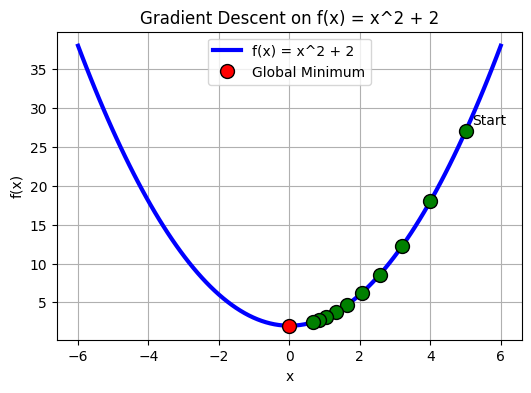

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 + 2

x = np.linspace(-6, 6, 100)
y = f(x)

plt.figure(figsize=(6, 4))
plt.plot(x, y, 'b-', label='f(x) = x^2 + 2', linewidth=3)
plt.plot(0, 2, 'ro', label='Global Minimum', markersize=10, markeredgecolor='black')

x_current = 5
for i in range(10):
    y_current = f(x_current)
    plt.plot(x_current, y_current, 'go', markersize=10, markeredgecolor='black')
    if i == 0:
        plt.annotate('Start', (x_current, y_current), xytext=(5, 5), textcoords='offset points')
    x_current = x_current - 0.1 * (2 * x_current)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent on f(x) = x^2 + 2')
plt.legend()
plt.grid(True)

This code will produce a graph showing the parabola and the steps of gradient descent converging towards the minimum.


### <a id='toc2_4_'></a>[Key Points](#toc0_)


- Gradient descent iteratively moves towards the minimum.
- The learning rate $\alpha$ determines the size of each step.
- Too large a learning rate can overshoot the minimum, while too small a rate can make convergence slow.
- This basic version works well for simple, convex functions but may struggle with more complex landscapes.


Understanding this basic algorithm lays the foundation for more advanced variants we'll explore in future sections.

## <a id='toc3_'></a>[Learning Rate and Its Importance](#toc0_)

The learning rate, often denoted as α (alpha), is a crucial hyperparameter in the gradient descent algorithm. It determines the size of the steps we take when moving towards the minimum of our objective function.


The learning rate is a positive scalar that scales the magnitude of our steps. In the gradient descent update rule:

$$x_{new} = x_{old} - \alpha \nabla f(x_{old})$$

α is the learning rate that controls how much we adjust our parameters in the direction of the gradient.


### <a id='toc3_1_'></a>[Why is the Learning Rate Important?](#toc0_)


The learning rate significantly impacts the behavior and effectiveness of gradient descent:

1. **Convergence Speed**: It affects how quickly the algorithm reaches the minimum.
2. **Stability**: It influences whether the algorithm converges at all or oscillates.
3. **Precision**: It determines how close we can get to the true minimum.


### <a id='toc3_2_'></a>[The Goldilocks Principle: Finding the Right Learning Rate](#toc0_)


Choosing the right learning rate is crucial and often requires experimentation. We can think of it in terms of the "Goldilocks principle":

1. **Too Small**: 
   - Progress is slow
   - May get stuck in local minima
   - Computationally expensive due to many iterations

2. **Too Large**:
   - May overshoot the minimum
   - Can lead to divergence or oscillation
   - Might miss the optimal solution entirely

3. **Just Right**:
   - Converges efficiently to the minimum
   - Balances speed and precision


### <a id='toc3_3_'></a>[Visualizing Learning Rate Effects](#toc0_)


Let's visualize how different learning rates affect convergence:

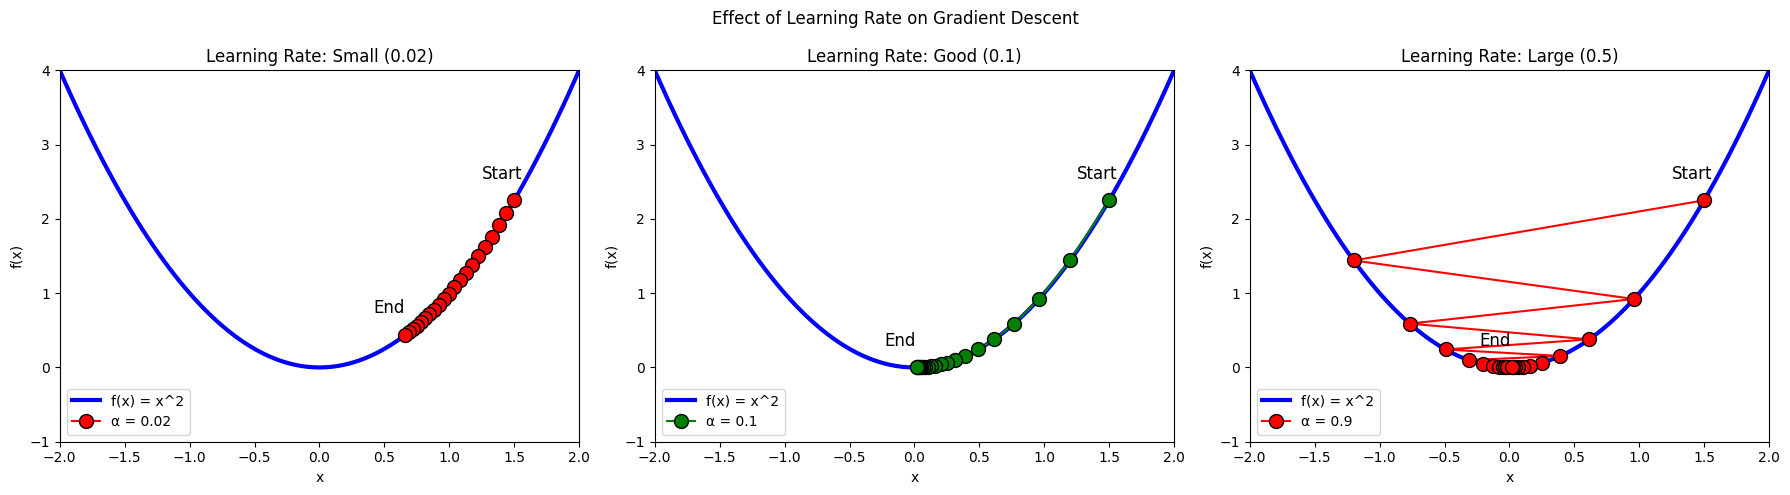

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def gradient_descent(start, learn_rate, num_iterations):
    x = start
    x_history = [x]
    for _ in range(num_iterations):
        x = x - learn_rate * 2 * x  # gradient of x^2 is 2x
        x_history.append(x)
    return x_history

x = np.linspace(-2, 2, 100)
y = f(x)

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Effect of Learning Rate on Gradient Descent')

learn_rates = [0.02, 0.1, 0.9]
colors = ['r', 'g', 'r']
labels = ['Small (0.02)', 'Good (0.1)', 'Large (0.5)']

for i, (rate, color, label) in enumerate(zip(learn_rates, colors, labels)):
    x_hist = gradient_descent(1.5, rate, 20)

    axs[i].plot(x, y, 'b-', label='f(x) = x^2', linewidth=3)
    axs[i].plot(x_hist, [f(x) for x in x_hist], f'{color}o-', label=f'α = {rate}', markersize=10, markeredgecolor='black')

    axs[i].set_xlabel('x')
    axs[i].set_ylabel('f(x)')
    axs[i].legend()
    axs[i].set_title(f'Learning Rate: {label}')
    axs[i].set_xlim(-2, 2)
    axs[i].set_ylim(-1, 4)

    # Annotate the start and end points
    axs[i].annotate('Start', (x_hist[0] - 0.3, f(x_hist[0]) + 0.2), xytext=(5, 5), textcoords='offset points', fontsize=12)
    axs[i].annotate('End', (x_hist[-1] - 0.3, f(x_hist[-1]) + 0.2), xytext=(5, 5), textcoords='offset points', fontsize=12)

plt.tight_layout()
plt.show()


This code generates a plot showing how different learning rates affect the convergence path.


### <a id='toc3_4_'></a>[Strategies for Choosing Learning Rates](#toc0_)

The learning rate is a critical hyperparameter in gradient descent, balancing the speed of convergence with the precision of the solution. Its importance cannot be overstated, as it significantly impacts the algorithm's performance and stability. Here are some practical strategies for choosing learning rates:

1. **Start Small and Scale Up**: 
   - Begin with a small learning rate (e.g., 0.001 or 0.01)
   - Gradually increase if convergence is too slow

2. **Learning Rate Schedules**: 
   - Decrease the learning rate over time
   - Helps fine-tune near the minimum
   - Common schedules: Step decay, exponential decay, or cosine annealing

3. **Exponential Range Search**:
   - Test learning rates across exponential ranges (e.g., 0.001, 0.01, 0.1, 1)
   - Helps quickly identify the general magnitude of an effective learning rate

4. **Adaptive Methods**:
   - Use algorithms like Adam, RMSprop, or AdaGrad
   - These methods automatically adjust the learning rate during training

5. **Learning Rate Warmup**:
   - Start with a very small learning rate and gradually increase it
   - Particularly useful in deep learning models



No single strategy works universally, as the optimal learning rate depends on the specific problem, dataset, and model architecture. Experimentation and domain knowledge are key to finding the right learning rate for your machine learning tasks. Keep in mind that the learning rate is just one of many hyperparameters that can be tuned to improve model performance. As you gain experience, you'll develop an intuition for selecting learning rates effectively across various scenarios and algorithms.


Key takeaways from this section:
1. **Crucial Hyperparameter**: The learning rate often has the largest impact on model training among all hyperparameters.
2. **No One-Size-Fits-All**: The optimal learning rate varies depending on the specific problem, dataset, and model architecture.
3. **Monitoring is Essential**: Keep an eye on the loss curve during training. A good learning rate should show steady decrease in loss.
4. **Trade-off**: Too small a learning rate leads to slow convergence, while too large can cause divergence or oscillation.
5. **Advanced Techniques**: In practice, many researchers and practitioners use adaptive learning rate methods to avoid manual tuning.
6. **Experiment and Iterate**: Finding the right learning rate often requires experimentation and domain knowledge.
7. **Impact on Training Time**: A well-chosen learning rate can significantly reduce the time required to train a model effectively.


Understanding and effectively managing the learning rate is a key skill in applying gradient descent and, more broadly, in training machine learning models. As you progress in your machine learning journey, you'll develop an intuition for selecting and tuning learning rates across various scenarios and algorithms.


Understanding the role of the learning rate is crucial for effectively applying gradient descent in practice. As we explore more advanced optimization techniques, we'll see how the concept of learning rate evolves and becomes more sophisticated.

## <a id='toc4_'></a>[Challenges with Basic Gradient Descent](#toc0_)

While the basic gradient descent algorithm is powerful and widely used, it comes with several challenges that can impact its effectiveness in certain scenarios. Understanding these challenges is crucial for recognizing when to use more advanced optimization techniques.


### <a id='toc4_1_'></a>[Choosing the Right Learning Rate](#toc0_)


**Challenge**: 
The learning rate significantly affects the algorithm's performance, but finding the optimal value can be difficult.


**Impact**:
- Too large: Can cause divergence or oscillation around the minimum.
- Too small: Can result in slow convergence or getting stuck in local minima.


### <a id='toc4_2_'></a>[Sensitivity to Feature Scaling](#toc0_)


**Challenge**: 
The algorithm performs poorly when features have different scales.


**Impact**:
- Can lead to slow convergence or zigzagging towards the minimum.
- Some features may dominate the learning process.


**Solution**:
- Normalize or standardize features before applying gradient descent.


### <a id='toc4_3_'></a>[Inefficiency for Large Datasets](#toc0_)


**Challenge**: 
Basic gradient descent computes the gradient using the entire dataset in each iteration.


**Impact**:
- Can be computationally expensive and slow for large datasets.
- May be impractical for very large or streaming datasets.


**Solution**:
- Use variants like Stochastic Gradient Descent or Mini-batch Gradient Descent.


### <a id='toc4_4_'></a>[Getting Trapped in Local Minima](#toc0_)


**Challenge**: 
In non-convex optimization problems, gradient descent can get stuck in local minima.


**Impact**:
- May not find the global optimum solution.
- Performance of the model may be suboptimal.


**Solutions**:
- Use momentum-based methods.
- Implement random restarts.
- Apply more advanced optimization algorithms.


### <a id='toc4_5_'></a>[Saddle Points in High Dimensions](#toc0_)


**Challenge**: 
In high-dimensional spaces, saddle points become more common than local minima.


**Impact**:
- The algorithm may slow down significantly near saddle points.
- Can be mistaken for a local minimum in practice.


**Solution**:
- Use methods that can escape saddle points, like momentum or adaptive learning rate algorithms.


### <a id='toc4_6_'></a>[Plateau Regions](#toc0_)


**Challenge**: 
Gradient descent can slow down in flat regions where the gradient is close to zero.


**Impact**:
- Very slow progress in plateau regions of the loss landscape.
- May prematurely appear to have converged.


**Solution**:
- Adaptive learning rate methods can help navigate plateau regions more effectively.


### <a id='toc4_7_'></a>[Key Takeaways](#toc0_)


1. **No Free Lunch**: Basic gradient descent is not a one-size-fits-all solution.
2. **Problem-Specific**: The effectiveness of gradient descent depends on the nature of the optimization problem.
3. **Preprocessing Matters**: Proper data preparation, especially feature scaling, is crucial.
4. **Advanced Variants**: Many of these challenges are addressed by more sophisticated variants of gradient descent.
5. **Monitoring**: It's important to monitor the optimization process to detect issues like slow convergence or oscillation.


Understanding these challenges helps in recognizing when to apply more advanced optimization techniques or when to preprocess data differently. As we progress, we'll explore various methods designed to overcome these limitations of basic gradient descent.

## <a id='toc5_'></a>[Connecting Gradient Descent to Machine Learning](#toc0_)

Gradient Descent is fundamental in machine learning, particularly for estimating model parameters. Let's explore how this optimization algorithm is used to estimate weights in a linear regression model.


### <a id='toc5_1_'></a>[Linear Regression Model](#toc0_)


Consider a simple linear regression model:

$y = wx + b$


Where:
- $y$ is the predicted output
- $x$ is the input feature
- $w$ is the weight (slope)
- $b$ is the bias (y-intercept)


We can represent this more compactly by considering $b$ as another weight and adding a constant feature:

$y = w_1x + w_0$


Where $w_0 = b$ and we've added a constant feature $x_0 = 1$ to our input.


### <a id='toc5_2_'></a>[Objective: Minimize Loss](#toc0_)


Our goal is to find the best values for $w_0$ and $w_1$ that minimize the difference between predictions and actual values. We use the Mean Squared Error (MSE) as our loss function:

$MSE = \frac{1}{n}\sum_{i=1}^n (y_i - (w_1x_i + w_0))^2$


Where $n$ is the number of data points, and $y_i$ are the actual values.


### <a id='toc5_3_'></a>[Gradient Descent Process](#toc0_)


1. **Initialize weights**: Start with random values for $w_0$ and $w_1$.

2. **Compute gradients**: Calculate the partial derivatives of MSE with respect to each weight:

   $\frac{\partial MSE}{\partial w_1} = -\frac{2}{n}\sum_{i=1}^n x_i(y_i - (w_1x_i + w_0))$

   $\frac{\partial MSE}{\partial w_0} = -\frac{2}{n}\sum_{i=1}^n (y_i - (w_1x_i + w_0))$

3. **Update weights**: Adjust weights in the opposite direction of the gradient:

   $w_1 = w_1 - \alpha \frac{\partial MSE}{\partial w_1}$

   $w_0 = w_0 - \alpha \frac{\partial MSE}{\partial w_0}$

   Where $\alpha$ is the learning rate.

4. **Repeat**: Continue steps 2-3 until convergence or for a fixed number of iterations.


### <a id='toc5_4_'></a>[Implementation and Visualization](#toc0_)


Estimated weights: w0 (bias) = 1.41, w1 = 1.94


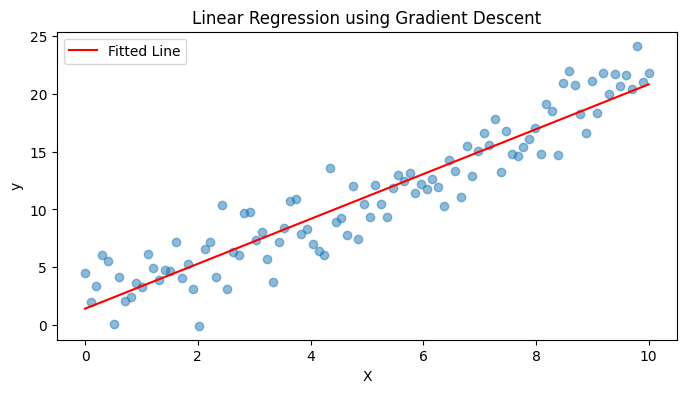

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 2 * X + 1 + np.random.randn(100) * 2

# Add constant term to X for bias
X_b = np.c_[np.ones((100, 1)), X]

# Gradient Descent function
def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    weights = np.zeros(n)
    for _ in range(iterations):
        predictions = X.dot(weights)
        errors = y - predictions
        gradient = -2/m * X.T.dot(errors)
        weights -= learning_rate * gradient
    return weights

# Perform gradient descent
final_weights = gradient_descent(X_b, y)

# Plotting
plt.figure(figsize=(8, 4))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, final_weights[1] * X + final_weights[0], 'r', label='Fitted Line')
plt.title('Linear Regression using Gradient Descent')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

print(f"Estimated weights: w0 (bias) = {final_weights[0]:.2f}, w1 = {final_weights[1]:.2f}")

This linear regression example illustrates how gradient descent is used in machine learning:
1. **Model Representation**: The weights ($w_0$, $w_1$) represent our model's parameters. Gradient descent helps us find the optimal values for these parameters.

2. **Iterative Learning**: The process mimics how machine learning models "learn" from data, gradually improving their predictions.

3. **Generalization**: While we've used a simple linear model, the same principle applies to more complex models with many parameters, including neural networks.

4. **Scalability**: For larger datasets or more complex models, we might use variants like Stochastic Gradient Descent or Mini-batch Gradient Descent, which estimate gradients using subsets of the data.

5. **Loss Landscape**: The MSE function creates a loss landscape. Gradient descent navigates this landscape to find the minimum, which corresponds to the best-fitting model.


Understanding this process provides insight into how machine learning models are trained and optimized. As we progress, we'll explore how these concepts extend to more complex models and scenarios in machine learning.

## <a id='toc6_'></a>[Summary and Looking Ahead](#toc0_)

In this lecture, we've explored the fundamental concepts of gradient descent and its application in machine learning:

1. We introduced gradient descent as an iterative optimization algorithm used to minimize a function.
2. We discussed the crucial role of the learning rate in controlling the algorithm's behavior.
3. We examined the challenges associated with basic gradient descent, including the difficulty in choosing an optimal learning rate and its sensitivity to feature scaling.
4. We connected gradient descent to machine learning by demonstrating its use in linear regression for weight estimation.
5. We implemented a simple gradient descent algorithm for linear regression and visualized the results.


Key takeaway: Gradient descent is a powerful tool for optimizing machine learning models, allowing us to find the best parameters that minimize the difference between predictions and actual values.


As we progress in our study of optimization techniques in machine learning, we'll explore:

1. **Stochastic Gradient Descent (SGD)**: How this variant improves efficiency for large datasets.
2. **Mini-batch Gradient Descent**: Balancing the trade-offs between batch and stochastic methods.
3. **Momentum and Nesterov Accelerated Gradient**: Techniques to improve convergence and overcome local minima.
4. **Adaptive Learning Rate Methods**: Algorithms like AdaGrad, RMSprop, and Adam that automatically adjust the learning rate.
5. **Application to Neural Networks**: How these concepts extend to training deep learning models.
6. **Advanced Optimization Landscapes**: Dealing with non-convex optimization problems in complex models.


Understanding these advanced topics will equip you with a comprehensive toolkit for training and optimizing a wide range of machine learning models efficiently and effectively.


In our next lecture, we'll dive into Stochastic Gradient Descent, exploring how it addresses some of the limitations of batch gradient descent and its practical implications for large-scale machine learning problems.